# Installing libraries

In [39]:
!pip install seaborn

# import libraries

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Reading the dataset

In [41]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Information of the dataset

In [1]:
df.desc()

NameError: name 'df' is not defined

# Checking Null Values

In [43]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [44]:
df = df.dropna()

In [45]:
df.shape

(334, 7)

In [46]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [47]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


In [48]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [49]:
df = df[df['sex']!='.']

In [50]:
df.shape

(333, 7)

In [51]:
df.nunique()

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64


Male, Female = df['sex'].value_counts()
print("Number of male:", Male)
print("Number of Females:", Female)

In [53]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# Plotting the scatter plot

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

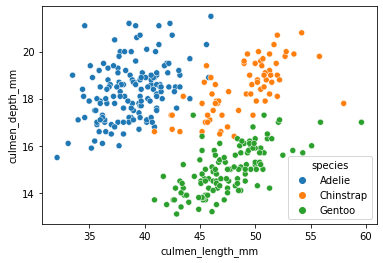

In [54]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=df, hue="species")

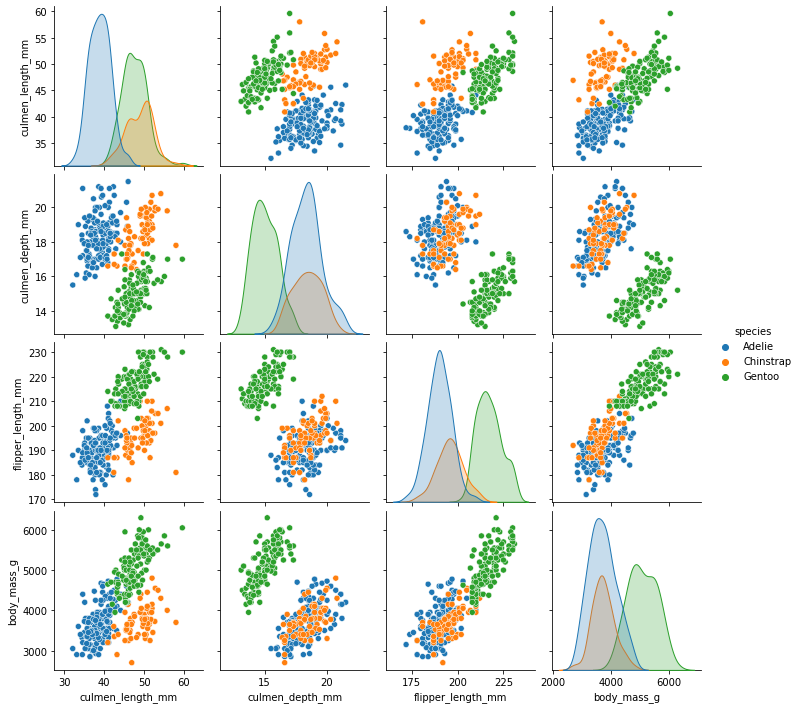

In [55]:
sns.pairplot(data=df, hue = "species")

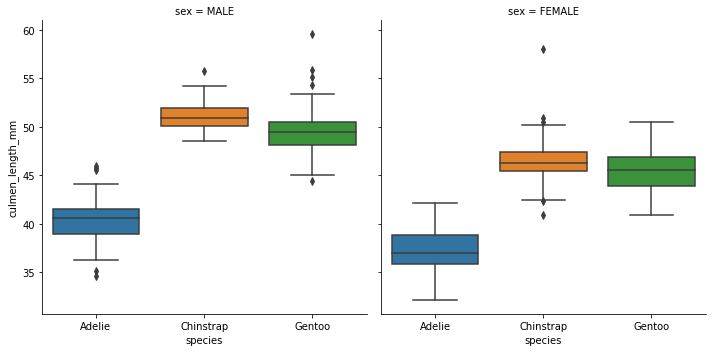

In [57]:
sns.catplot(data=df, x="species", y="culmen_length_mm", kind="box", col="sex")

# Slicing the dataset into input and output

In [61]:
x = df.iloc[:, 2:6]
y = df['species']


# Splitting the dataset

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# training the model

In [63]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
base_pred = model.predict(x_test)

In [65]:
print("Accuracy Score: ", accuracy_score(y_test, base_pred))

Accuracy Score:  0.9701492537313433


# Confusion Matrix

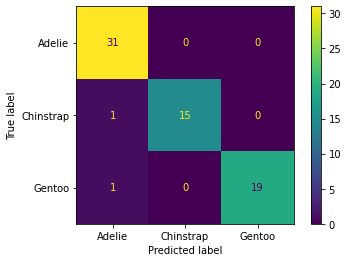

In [67]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, base_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

# Classification Report

In [70]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        31
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67



In [71]:
model.feature_importances_

array([0.3529987 , 0.08151006, 0.54456291, 0.02092833])

In [72]:
pd.DataFrame(index=x.columns, data=model.feature_importances_, columns=["Feature Importances"])

,Feature Importances
culmen_length_mm,0.352999
culmen_depth_mm,0.081510
flipper_length_mm,0.544563
body_mass_g,0.020928


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

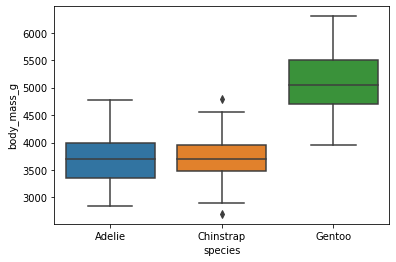

In [73]:
sns.boxplot(x="species", y="body_mass_g", data=df)

# Plot the decision tree

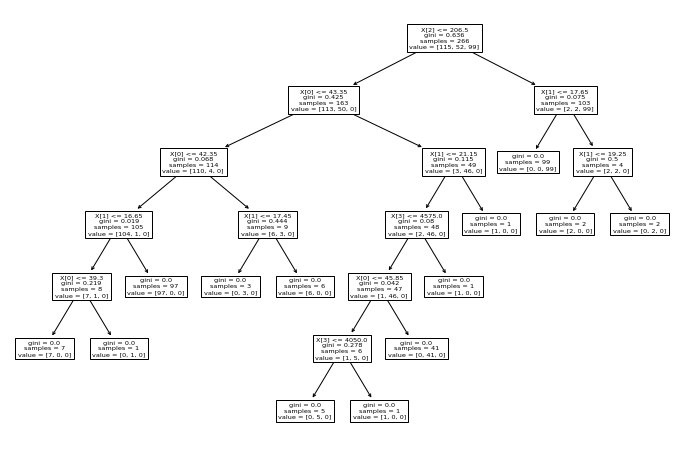

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

# Plot the decision tree with color


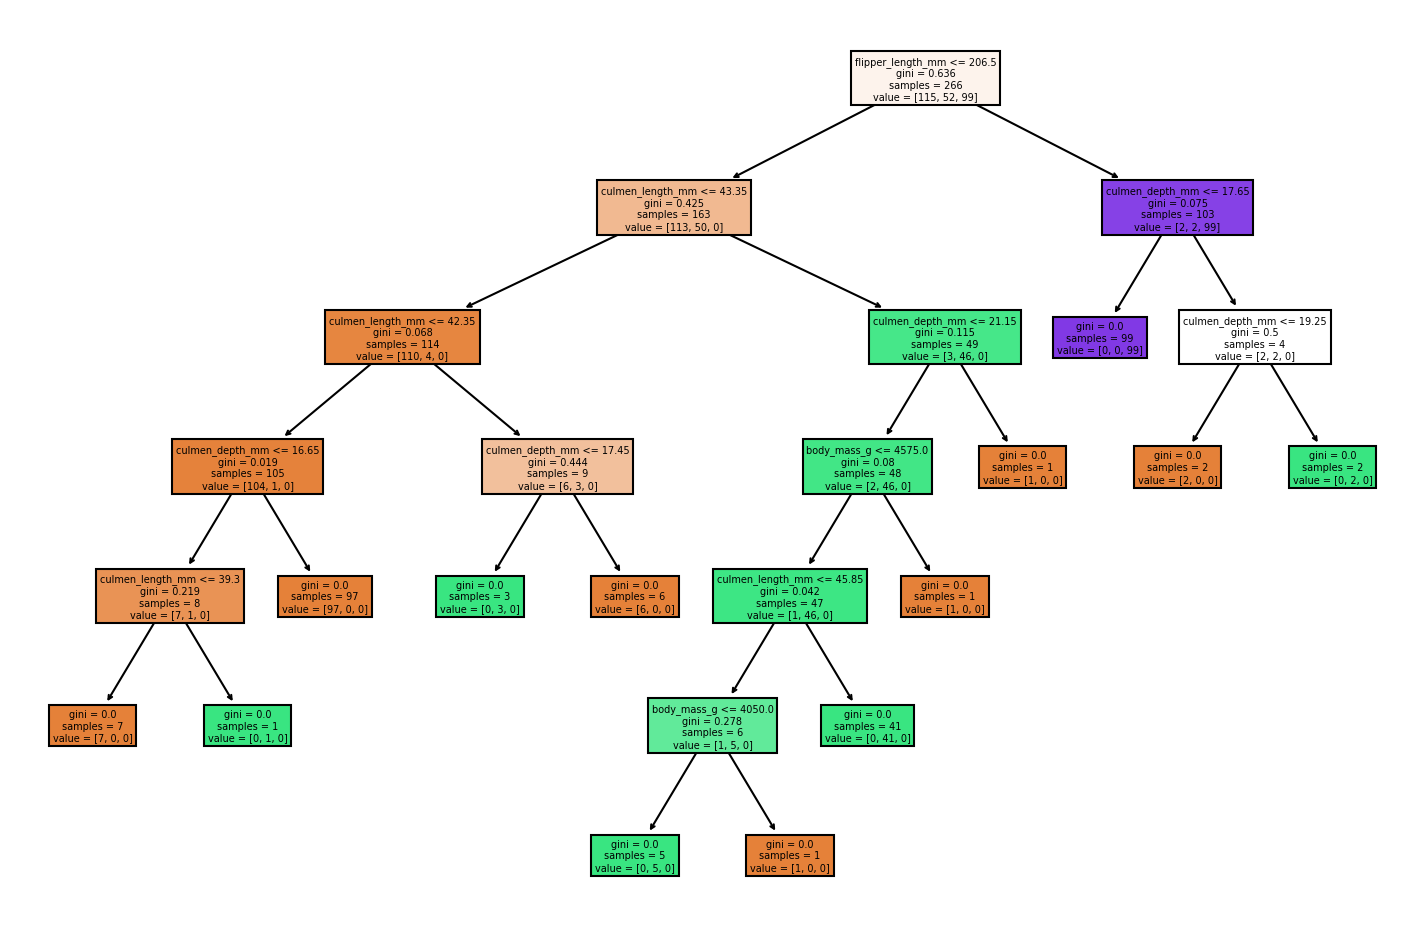

In [76]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(model, filled = True, feature_names=x.columns)
plt.show()

In [81]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print("\n")
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

# fitting the model for pruned tree

In [82]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

# plot the pruned decision tree and report

              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67





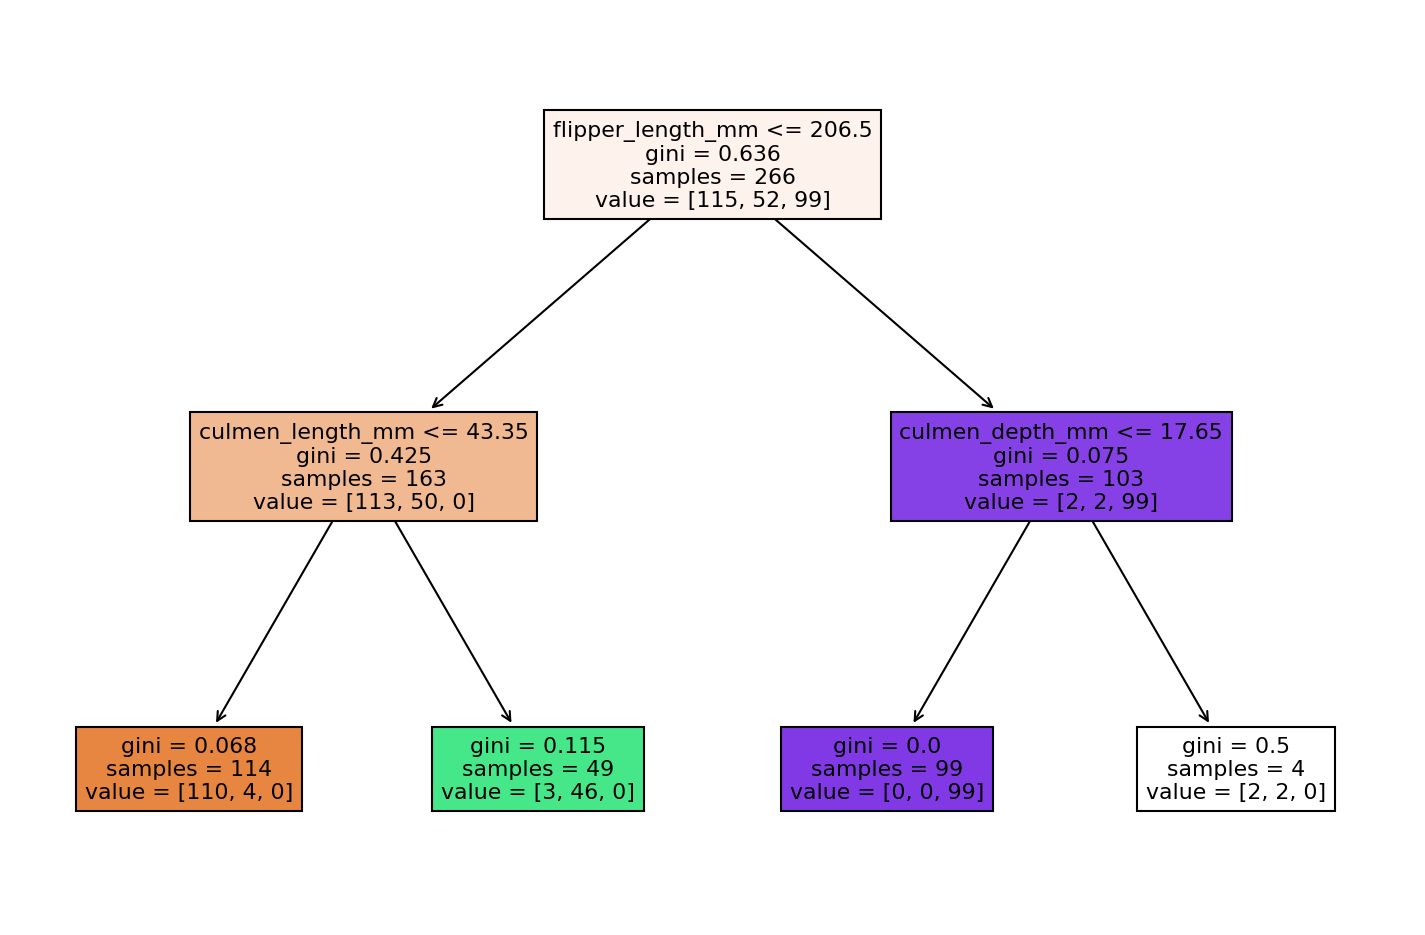

In [83]:
report_model(pruned_tree)

In [84]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       0.86      0.95      0.90        20

    accuracy                           0.91        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.91      0.91      0.91        67





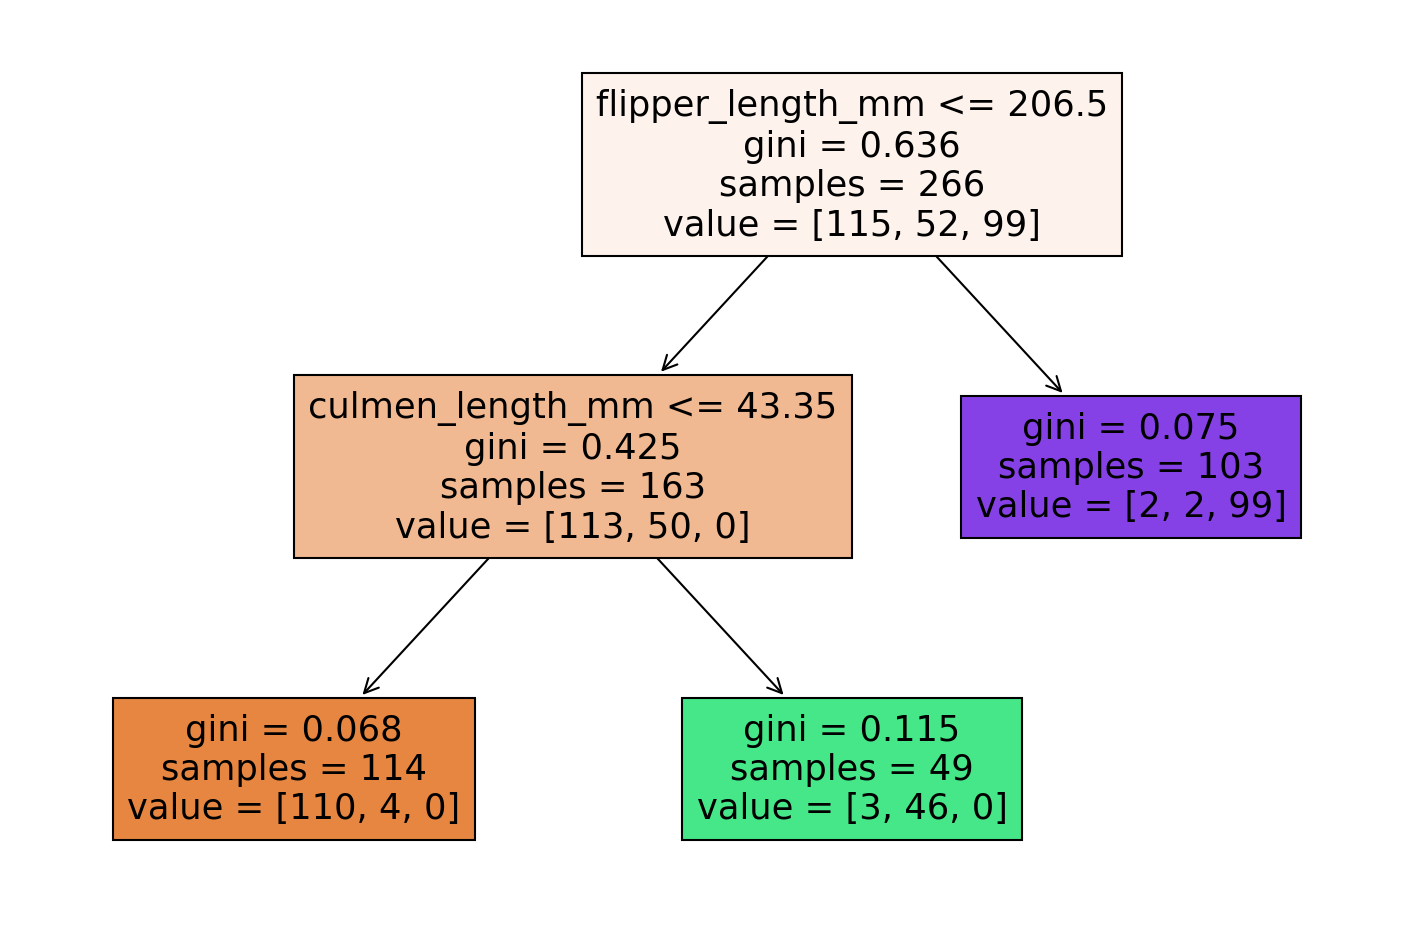

In [85]:
report_model(pruned_tree)

# fitting the model for entropy criteria

In [86]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
DecisionTreeClassifier(criterion = 'entropy')

DecisionTreeClassifier(criterion='entropy')

# plot the entropy decision tree 

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.99        67
   macro avg       0.98      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67





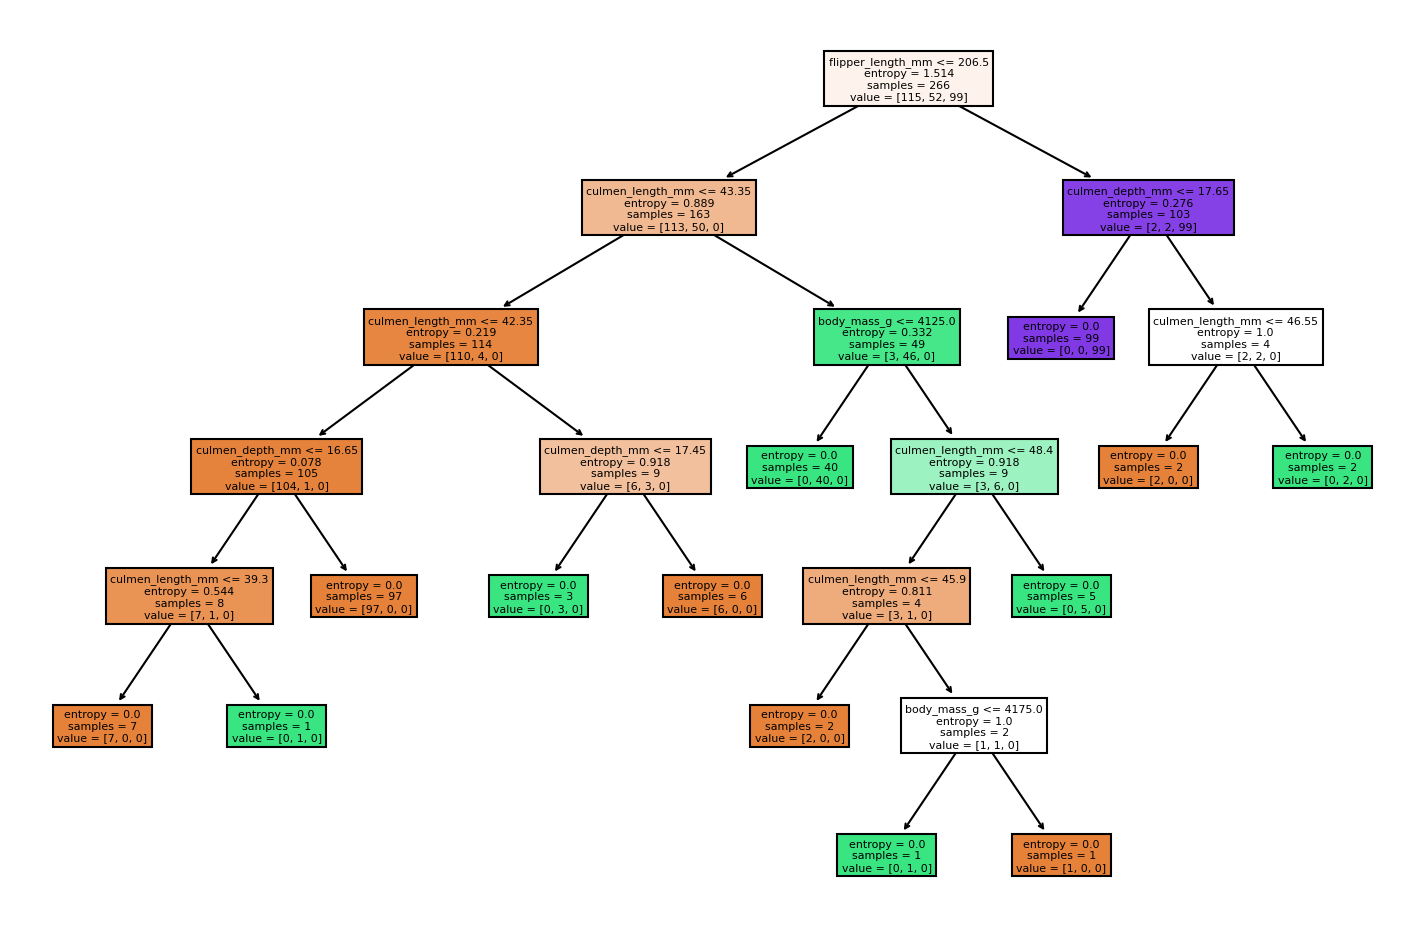

In [88]:
report_model(entropy_tree)